In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [7]:
ourData = pd.read_csv('Mall_Customers.csv')
ourData.head() 


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
newData = ourData.iloc[:, [3, 4]].values

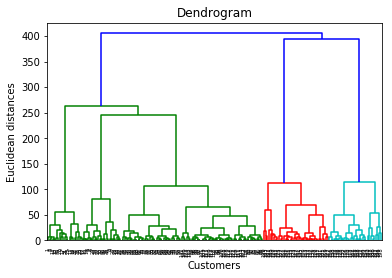

In [9]:
import scipy.cluster.hierarchy as sch 
dendrogram = sch.dendrogram(sch.linkage(newData, method = 'ward')) 
plt.title('Dendrogram')
plt.xlabel('Customers') 
plt.ylabel('Euclidean distances') 
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering
'''
we need to create an AgglomerativeClustering object, and in it, we pass the following param
n_cluster= 5, the number of clusters our model should return
affinity=euclidean, specify metric to be used to calculate distances
linkage= ward to regulate how distance calculation will be carried out between different cl
'''
Agg_hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = Agg_hc.fit_predict(newData) 

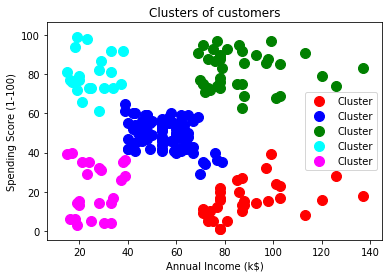

In [12]:
plt.scatter(newData[y_hc == 0, 0], newData[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster')
plt.scatter(newData[y_hc == 1, 0], newData[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster')
plt.scatter(newData[y_hc == 2, 0], newData[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster')
plt.scatter(newData[y_hc == 3, 0], newData[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster')
plt.scatter(newData[y_hc == 4, 0], newData[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()